In [26]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/Cleaned_data_train.csv")
df = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/claims_train.csv")

df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...,...
542405,2063494.0,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,4164964.0,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,3078112.0,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,1012927.0,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


KeyboardInterrupt: 

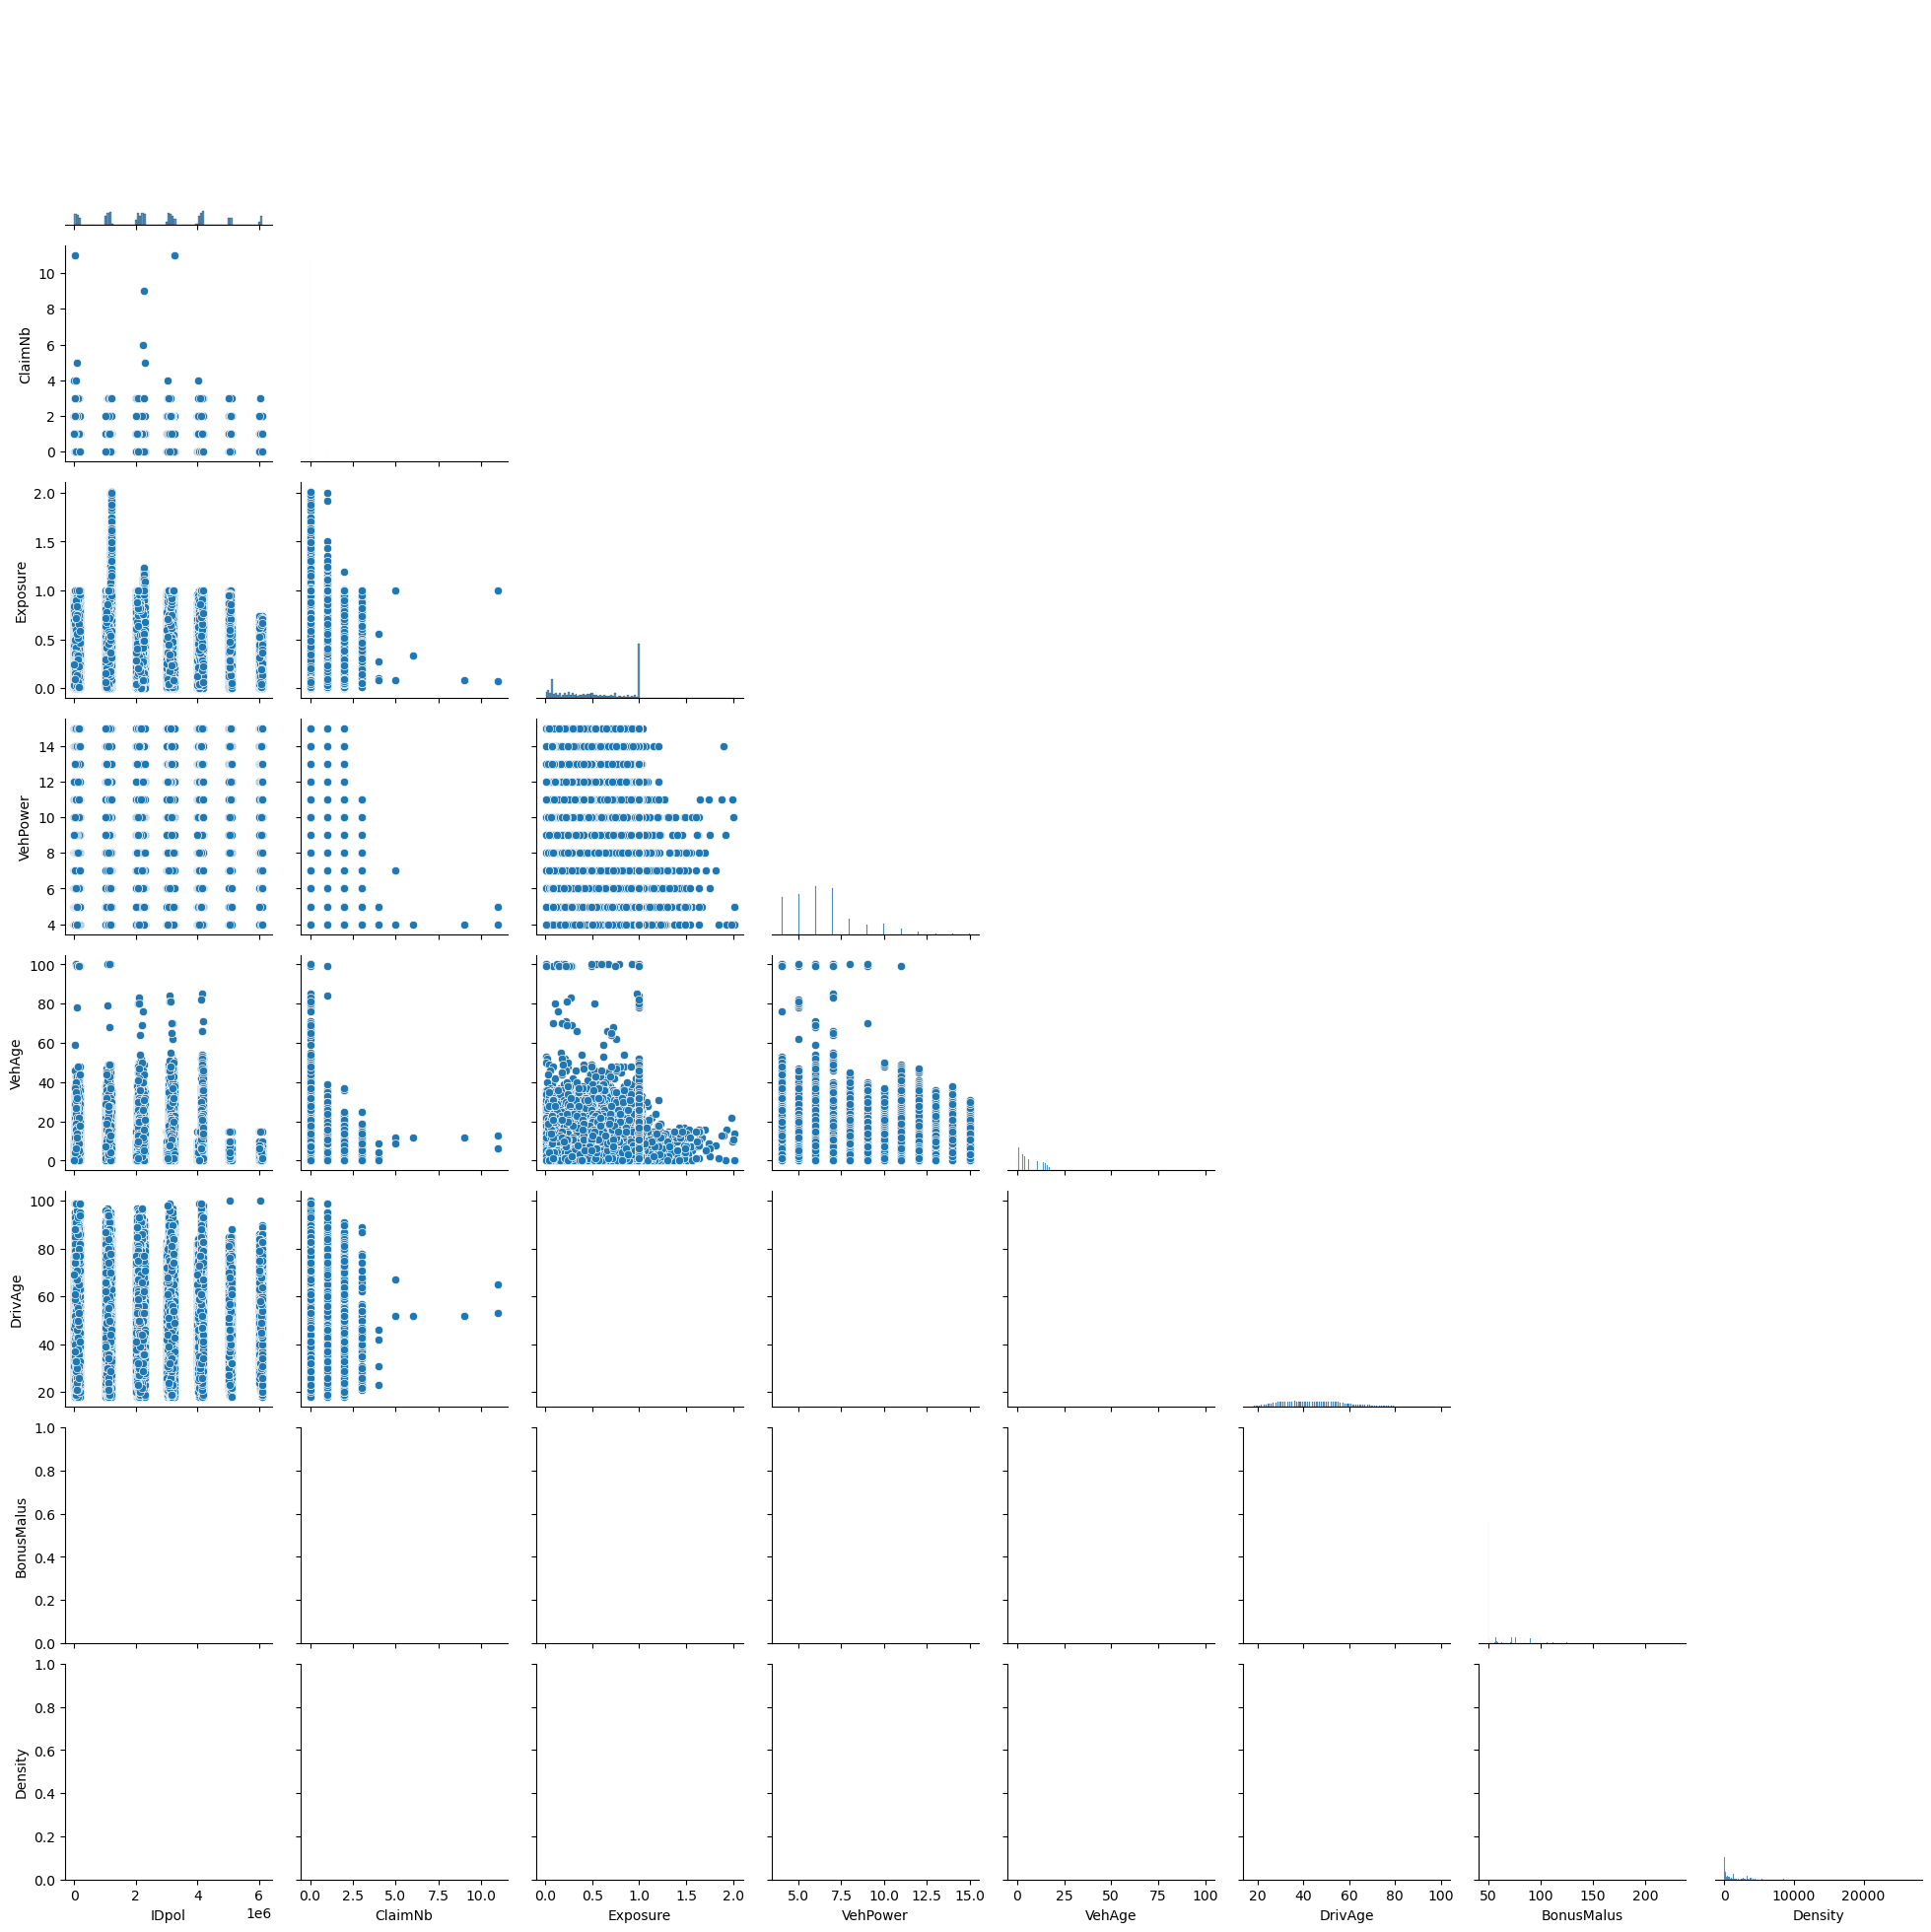

In [27]:
import seaborn as sns


df["ClaimNb"].value_counts()

sns.pairplot(df,corner=True)

In [19]:
df = df.dropna()


,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


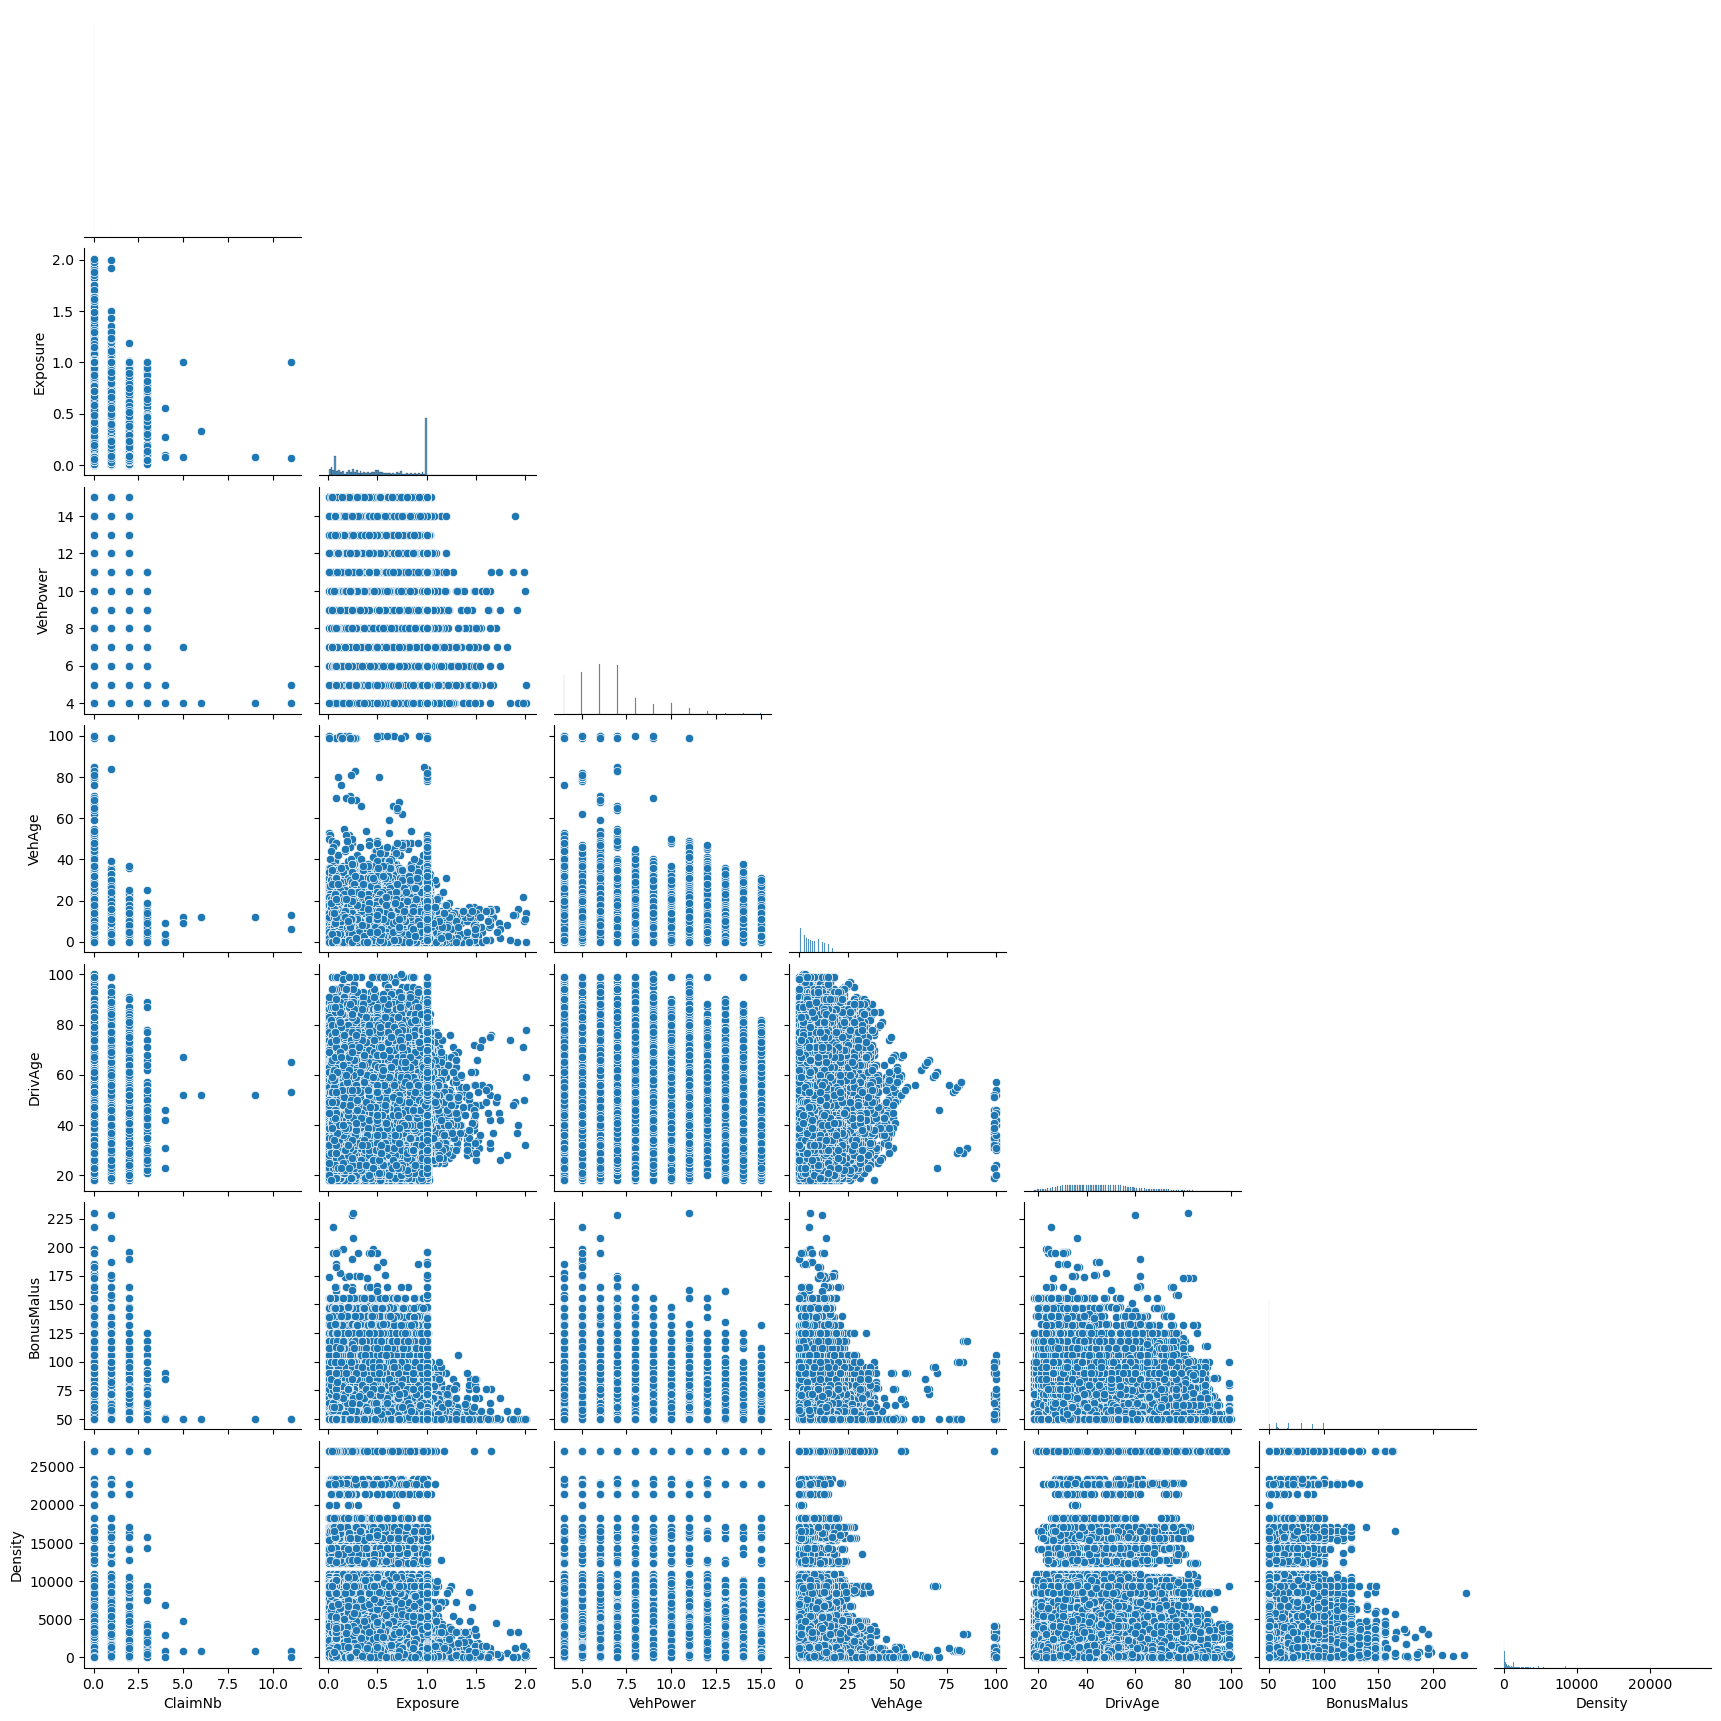

In [21]:
sns.pairplot(df,corner=True)

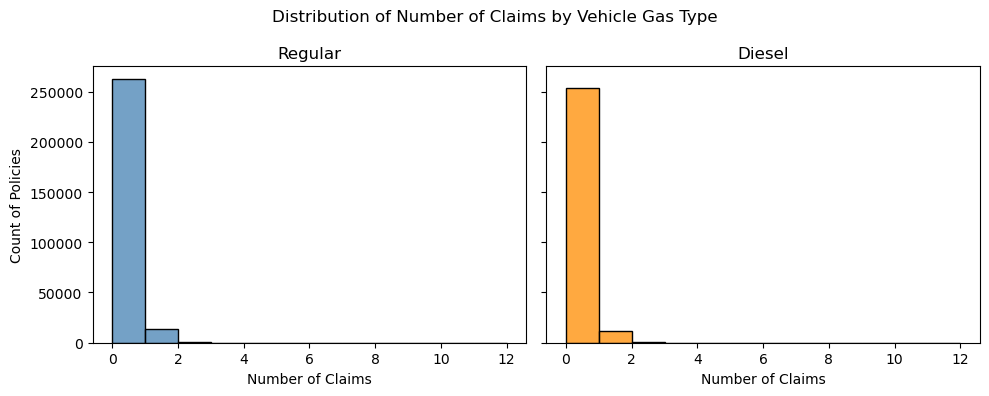

In [28]:




fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Regular
sns.histplot(
    data=df[df["VehGas"] == "Regular"],
    x="ClaimNb",
    bins=range(0, df["ClaimNb"].max() + 2),
    color="steelblue",
    ax=axes[0]
)
axes[0].set_title("Regular")
axes[0].set_xlabel("Number of Claims")
axes[0].set_ylabel("Count of Policies")

# Diesel
sns.histplot(
    data=df[df["VehGas"] == "Diesel"],
    x="ClaimNb",
    bins=range(0, df["ClaimNb"].max() + 2),
    color="darkorange",
    ax=axes[1]
)
axes[1].set_title("Diesel")
axes[1].set_xlabel("Number of Claims")
axes[1].set_ylabel("")

# Overall title and layout
fig.suptitle("Distribution of Number of Claims by Vehicle Gas Type")
plt.tight_layout()
plt.show()


In [28]:
df = df.drop("IDpol",axis=1)
df_new = df.drop("VehGas",axis=1)
df_new

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region
0,0,0.43,D,7,18,36,95,B1,1054,R24
1,0,0.10,D,7,17,80,95,B2,598,R25
2,0,0.33,E,7,3,36,76,B6,4172,R82
3,0,0.56,A,5,4,73,52,B13,15,R24
4,0,0.27,E,8,0,37,50,B11,3021,R53
...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,D,6,10,32,76,B2,1314,R24
542406,0,0.06,D,10,14,34,60,B5,685,R72
542407,0,0.34,C,6,8,32,95,B5,242,R82
542408,0,0.72,E,9,7,39,72,B2,3301,R73


In [29]:
df_new = df_new.drop("Area", axis=1)
#df_new = df_new.drop("VehGas",axis=1)

df_new

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region
0,0,0.43,7,18,36,95,B1,1054,R24
1,0,0.10,7,17,80,95,B2,598,R25
2,0,0.33,7,3,36,76,B6,4172,R82
3,0,0.56,5,4,73,52,B13,15,R24
4,0,0.27,8,0,37,50,B11,3021,R53
...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,B2,1314,R24
542406,0,0.06,10,14,34,60,B5,685,R72
542407,0,0.34,6,8,32,95,B5,242,R82
542408,0,0.72,9,7,39,72,B2,3301,R73


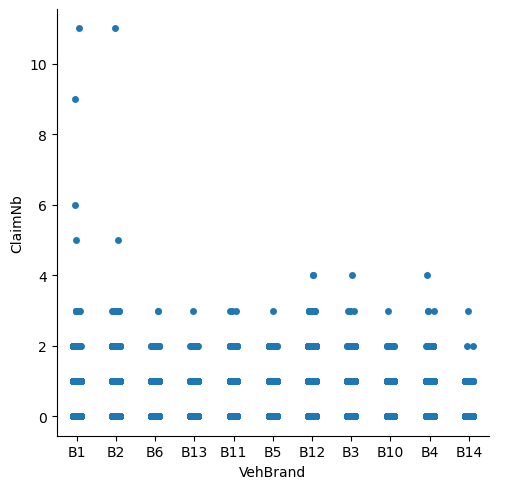

In [13]:

sns.catplot(data=df_new,x="VehBrand",y="ClaimNb")

In [30]:
df_new = df_new.drop("VehBrand", axis=1)

In [34]:
df_encoded = pd.get_dummies(df_new,columns=["VehBrand","Region"], dtype="int")

In [35]:
df_encoded

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0,0.43,7,18,36,95,1054,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.10,7,17,80,95,598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.33,7,3,36,76,4172,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.56,5,4,73,52,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.27,8,0,37,50,3021,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542406,0,0.06,10,14,34,60,685,0,0,0,...,0,0,1,0,0,0,0,0,0,0
542407,0,0.34,6,8,32,95,242,0,0,1,...,0,0,0,0,0,1,0,0,0,0
542408,0,0.72,9,7,39,72,3301,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_encoded.to_csv("Cleaned_data_train.csv", index=False)

In [35]:
df_exp = df_new[df_new["Exposure"]<=1.0]
df_exp["Exposure"].max()

1.0

In [51]:
df_exp = df_exp.drop("Region",axis=1)


In [54]:
df_exp = df_exp.drop("Cluster",axis=1)


KeyError: "['Cluster'] not found in axis"

/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_1518/850245387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['Cluster'] = labels


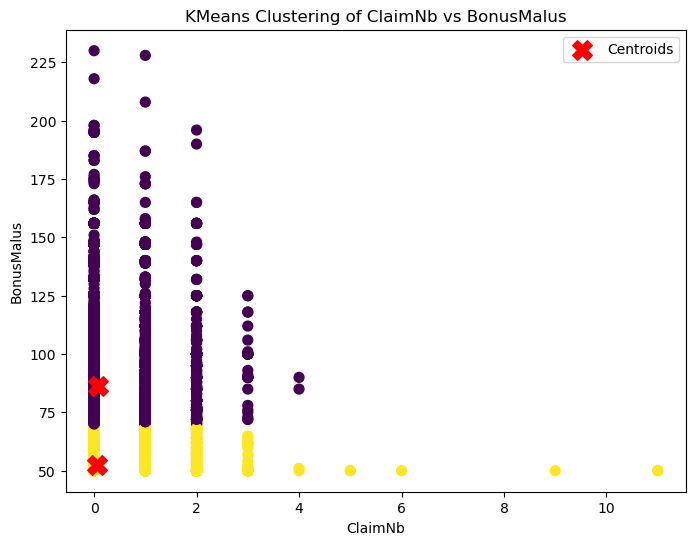

In [40]:
from sklearn.cluster import KMeans

X = df_exp[["ClaimNb","BonusMalus"]]
kmeans = KMeans(n_clusters=2,random_state=42).fit(X)
labels = kmeans.labels_

# Add labels to the DataFrame (optional)
df_exp['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['ClaimNb'], X['BonusMalus'], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering of ClaimNb vs BonusMalus')
plt.xlabel('ClaimNb')
plt.ylabel('BonusMalus')
plt.legend()
plt.show()

In [47]:
df_noRegion = df_exp.drop(["Region","Cluster"], axis=1)

<Axes: >

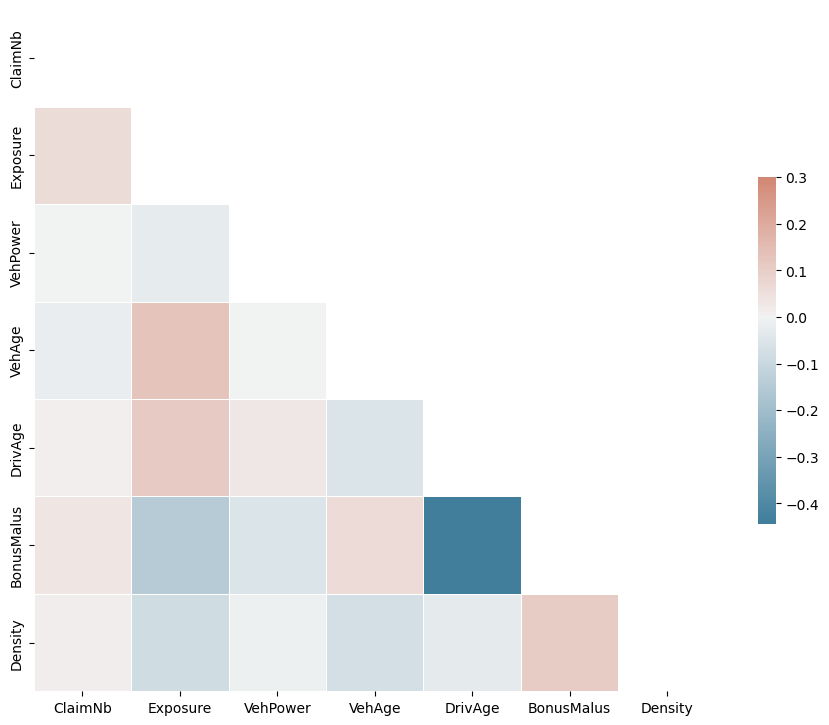

In [50]:
import numpy as np
corr = df_noRegion.corr(method="kendall")
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
X = df_exp.drop("ClaimNb",axis=1)
y= df_exp["ClaimNb"]
scaler = StandardScaler()
X_SCALED = scaler.fit_transform(X)
X

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
0,0.43,7,18,36,95,1054
1,0.10,7,17,80,95,598
2,0.33,7,3,36,76,4172
3,0.56,5,4,73,52,15
4,0.27,8,0,37,50,3021
...,...,...,...,...,...,...
542405,0.20,6,10,32,76,1314
542406,0.06,10,14,34,60,685
542407,0.34,6,8,32,95,242
542408,0.72,9,7,39,72,3301


In [84]:
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_SCALED)

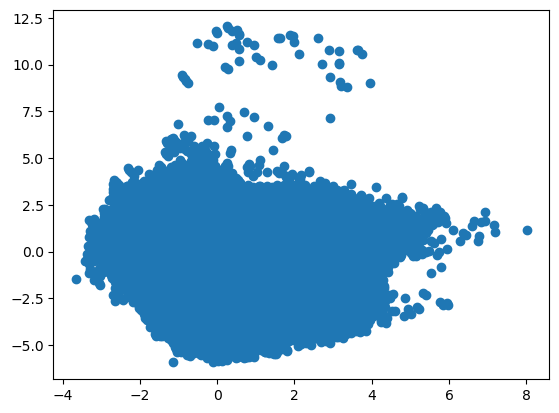

In [72]:
plt.scatter(X_pca[:,0],X_pca[:,1])

In [92]:
%matplotlib inline

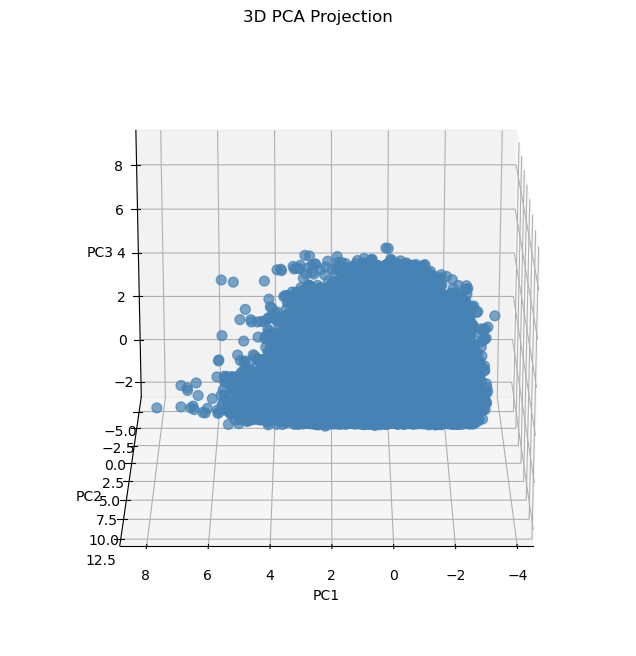

In [105]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           c='steelblue', s=50, alpha=0.7)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=20, azim=90) 
plt.show()

In [75]:
pca.explained_variance_ratio_

array([0.26705958, 0.20070989, 0.16597358, 0.15691401])

In [78]:
df_cleaned = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/Cleaned_data_train.csv")
df_cleaned

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0,0.43,7,18,36,95,1054,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.10,7,17,80,95,598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.33,7,3,36,76,4172,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.56,5,4,73,52,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.27,8,0,37,50,3021,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542406,0,0.06,10,14,34,60,685,0,0,0,...,0,0,1,0,0,0,0,0,0,0
542407,0,0.34,6,8,32,95,242,0,0,1,...,0,0,0,0,0,1,0,0,0,0
542408,0,0.72,9,7,39,72,3301,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
X = df_cleaned.drop("ClaimNb",axis=1)
y= df_cleaned["ClaimNb"]
scaler = StandardScaler()
X_SCALED = scaler.fit_transform(X)
X

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,Area_D,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0.43,7,18,36,95,1054,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.10,7,17,80,95,598,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.33,7,3,36,76,4172,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.56,5,4,73,52,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.27,8,0,37,50,3021,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0.20,6,10,32,76,1314,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
542406,0.06,10,14,34,60,685,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
542407,0.34,6,8,32,95,242,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
542408,0.72,9,7,39,72,3301,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_SCALED)
pca.explained_variance_ratio_

array([0.06312481, 0.04265885])

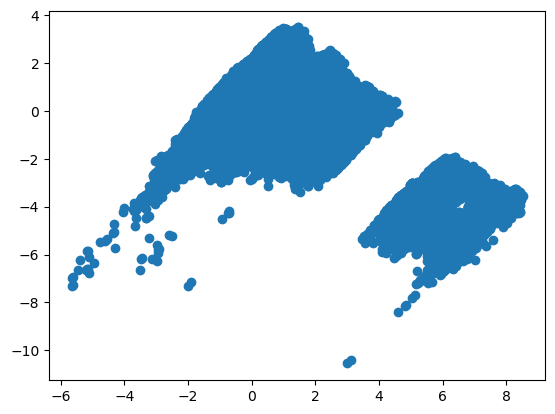

In [82]:
plt.scatter(X_pca[:,0],X_pca[:,1])